<a href="https://colab.research.google.com/github/aunz/Insight-Data-Science-Challenge/blob/master/Happy_Hotel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
!curl -o data.zip https://raw.githubusercontent.com/aunz/Insight-Data-Science-Challenge/master/happy_hotel.zip
!unzip -qq data.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 11.3M  100 11.3M    0     0  81.9M      0 --:--:-- --:--:-- --:--:-- 82.5M


In [0]:
df1 = pd.read_csv('hotel_happy_reviews.csv')
df2 = pd.read_csv('hotel_not_happy_reviews.csv')

In [15]:
print(df1.info())
df1.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26521 entries, 0 to 26520
Data columns (total 4 columns):
User_ID        26521 non-null object
Description    26521 non-null object
Is_Response    26521 non-null object
hotel_ID       26521 non-null int64
dtypes: int64(1), object(3)
memory usage: 828.9+ KB
None


,User_ID,Description,Is_Response,hotel_ID
1717,id12861,We just returned from our -rd. visit to Royal ...,happy,1
3526,id15514,I have stayed now a few times at this location...,happy,8
9243,id23956,We stayed at this hotel for a week; the staff ...,happy,1
23881,id45392,The older hotel was nicely furnished. Our room...,happy,3
14008,id30874,This HI Exp was in line with all the other Hol...,happy,4


In [17]:
print(df2.info())
df2.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12411 entries, 0 to 12410
Data columns (total 4 columns):
User_ID        12411 non-null object
Description    12411 non-null object
Is_Response    12411 non-null object
hotel_ID       12411 non-null int64
dtypes: int64(1), object(3)
memory usage: 387.9+ KB
None


,User_ID,Description,Is_Response,hotel_ID
3616,id21568,The property was clean and the desk and bell s...,not happy,5
5462,id27377,"I stayed here for one night on January --th, -...",not happy,10
4324,id23745,We were not very happy with this hotel and wou...,not happy,4
3075,id19829,We used the park and fly pkg. for our trip to ...,not happy,3
2128,id16891,We stayed at this hotel for one night during t...,not happy,4


In [30]:
# number of unique user
len(set(df1.User_ID.unique().tolist() + df2.User_ID.unique().tolist()))

38932

In [0]:
# change the Is_response to 1: happy, 0: unhappy
df1.Is_Response = 1
df2.Is_Response = 0

# drop user_id as it's not important
df1 = df1.drop('User_ID', 1)
df2 = df2.drop('User_ID', 1)

In [0]:
# strip white space
df1.Description = df1.Description.str.strip().str.lower()
df2.Description = df2.Description.str.strip().str.lower()

In [73]:
# number of words
tmp = df1.Description.str.split().apply(len)
print(tmp.describe())


tmp = df2.Description.str.split().apply(len)
print(tmp.describe())

tmp = df1.Description.str.len()
print(tmp.describe())

tmp = df2.Description.str.len()
print(tmp.describe())

count    26521.000000
mean       142.015912
std        117.225847
min          4.000000
25%         66.000000
50%        111.000000
75%        180.000000
max       1780.000000
Name: Description, dtype: float64
count    12411.000000
mean       190.109661
std        151.458119
min          5.000000
25%         92.000000
50%        151.000000
75%        239.500000
max       2289.000000
Name: Description, dtype: float64
count    26521.000000
mean       786.122997
std        645.734294
min         20.000000
25%        368.000000
50%        616.000000
75%        991.000000
max      10482.000000
Name: Description, dtype: float64
count    12411.000000
mean      1042.553864
std        833.261081
min         30.000000
25%        507.000000
50%        827.000000
75%       1308.000000
max      14340.000000
Name: Description, dtype: float64


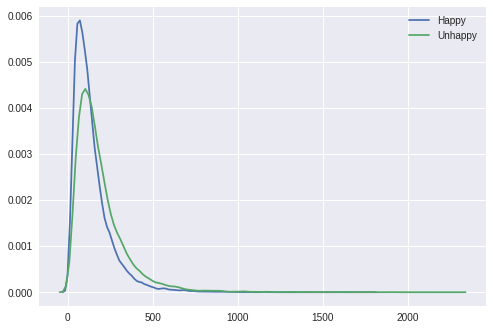

In [81]:
ax = sns.kdeplot(df1.Description.str.split().apply(len), label='Happy')
sns.kdeplot(df2.Description.str.split().apply(len), label='Unhappy');

,Happy,Unhappy,Happy %,Unhappy %
1,2179,1750,0.554594,0.445406
2,1046,1012,0.508260,0.491740
3,3470,1612,0.682802,0.317198
4,4651,2196,0.679276,0.320724
5,5540,1142,0.829093,0.170907
6,823,334,0.711322,0.288678
7,3019,2298,0.567801,0.432199
8,4503,850,0.841211,0.158789
9,513,483,0.515060,0.484940
10,777,734,0.514229,0.485771


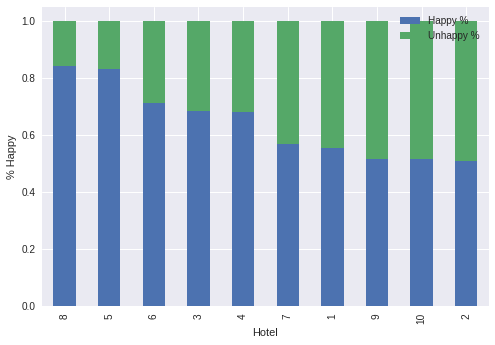

In [101]:
tmp = pd.concat([df1.hotel_ID.value_counts(), df2.hotel_ID.value_counts()], 1, keys=['Happy', 'Unhappy'])
tmp['Happy %'] = tmp['Happy'] / (tmp['Happy'] + tmp['Unhappy'])
tmp['Unhappy %'] = tmp['Unhappy'] / (tmp['Happy'] + tmp['Unhappy'])

tmp[['Happy %', 'Unhappy %']].sort_values('Unhappy %').plot(kind='bar', stacked=True)
plt.xlabel('Hotel')
plt.ylabel('% Happy')

tmp

In [236]:
import nltk
from nltk.corpus import stopwords

!pip install pyLDAvis

import numpy as np
import pandas as pd
import re, nltk, spacy, gensim

# Sklearn
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from pprint import pprint

# Plotting tools
import pyLDAvis
import pyLDAvis.sklearn
import matplotlib.pyplot as plt
%matplotlib inline

In [235]:
# not run as this takes tooooooo long

# tmp = ' '.join(df1.Description.str.lower())
# tmp = nltk.word_tokenize(tmp)
# tmp = list(filter(lambda x: x not in stopwords.words('english'), tmp))

# tmp = nltk.FreqDist(tmp)

# tmp.plot(20, cumulative = False)

4547441

In [244]:
df = pd.concat([df1, df2])

data = df.Description.values.tolist()

# Remove Emails
data = [re.sub('\S*@\S*\s?', '', sent) for sent in data]

# Remove new line characters
data = [re.sub('\s+', ' ', sent) for sent in data]

# Remove distracting single quotes
data = [re.sub("\'", "", sent) for sent in data]

# remove non english
data = [re.sub('[^a-zA-Z ]', '', sent) for sent in data]

data

<input>:6: DeprecationWarning: invalid escape sequence \S
<input>:6: DeprecationWarning: invalid escape sequence \S
<input>:6: DeprecationWarning: invalid escape sequence \S
<input>:6: DeprecationWarning: invalid escape sequence \S
<input>:6: DeprecationWarning: invalid escape sequence \S
<input>:6: DeprecationWarning: invalid escape sequence \S
<input>:6: DeprecationWarning: invalid escape sequence \S
<input>:6: DeprecationWarning: invalid escape sequence \S
<input>:6: DeprecationWarning: invalid escape sequence \S
<input>:6: DeprecationWarning: invalid escape sequence \S
<input>:9: DeprecationWarning: invalid escape sequence \s
<input>:6: DeprecationWarning: invalid escape sequence \S
<input>:9: DeprecationWarning: invalid escape sequence \s
<input>:6: DeprecationWarning: invalid escape sequence \S
<input>:9: DeprecationWarning: invalid escape sequence \s
<input>:6: DeprecationWarning: invalid escape sequence \S
<input>:9: DeprecationWarning: invalid escape sequence \s
<input>:6: Dep

['stayed here with husband and sons on the way to an alaska cruise we all loved the hotel great experience ask for a room on the north tower facing north west for the best views we had a high floor with a stunning view of the needle the city and even the cruise ships we ordered room service for dinner so we could enjoy the perfect views room service dinners were delicious too you are in a perfect spot to walk everywhere so enjoy the city almost forgot heavenly beds were heavenly too',
 'we had  rooms one was very nice and clearly had been updated more recently than the other the other was clean and the bed was comfy but it needed some updating carpet was old and wrinkled for example great location for visiting inner harbor getting to fells point orioles games etc supershuttle from bwi worked great both ways tv remotes in both rooms were terrible but we didnt watch much tv so not a big deal wireless was sketchy on th and th floors but again didnt need it much  we were on vacation so it 

In [245]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(data))

print(data_words[:1])

[['stayed', 'here', 'with', 'husband', 'and', 'sons', 'on', 'the', 'way', 'to', 'an', 'alaska', 'cruise', 'we', 'all', 'loved', 'the', 'hotel', 'great', 'experience', 'ask', 'for', 'room', 'on', 'the', 'north', 'tower', 'facing', 'north', 'west', 'for', 'the', 'best', 'views', 'we', 'had', 'high', 'floor', 'with', 'stunning', 'view', 'of', 'the', 'needle', 'the', 'city', 'and', 'even', 'the', 'cruise', 'ships', 'we', 'ordered', 'room', 'service', 'for', 'dinner', 'so', 'we', 'could', 'enjoy', 'the', 'perfect', 'views', 'room', 'service', 'dinners', 'were', 'delicious', 'too', 'you', 'are', 'in', 'perfect', 'spot', 'to', 'walk', 'everywhere', 'so', 'enjoy', 'the', 'city', 'almost', 'forgot', 'heavenly', 'beds', 'were', 'heavenly', 'too']]


In [246]:
def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(' '.join(sent)) 
        texts_out.append(' '.join([token.lemma_ if token.lemma_ not in ['-PRON-'] else '' for token in doc if token.pos_ in allowed_postags]))
    return texts_out

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# Run in terminal: python3 -m spacy download en
nlp = spacy.load('en', disable=['parser', 'ner'])

# Do lemmatization keeping only Noun, Adj, Verb, Adverb
data_lemmatized = lemmatization(data_words, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

data_lemmatized[:2]

['stay here husband son way alaska cruise love hotel great experience ask room north tower face north west good view have high floor stunning view needle city even cruise ship order room service dinner could enjoy perfect view room service dinner be delicious too be perfect spot walk everywhere so enjoy city almost forget heavenly bed be heavenly too',
 'have room be very nice clearly have be update more recently other other be clean bed be comfy need updating carpet be old wrinkle example great location visit inner harbor get fell point oriole game supershuttle bwi work great way tv remote room be terrible do not watch much tv so not big deal wireless be sketchy floor again do not need much be vacation do not really matter breakfast be good morning would stay again town']

In [0]:
vectorizer = CountVectorizer(analyzer='word',       
                             min_df=10,                        # minimum reqd occurences of a word 
                             stop_words='english',             # remove stop words
                             lowercase=True,                   # convert all words to lowercase
                             token_pattern='[a-zA-Z0-9]{3,}',  # num chars > 3
                             # max_features=50000,             # max number of uniq words
                            )

data_vectorized = vectorizer.fit_transform(data_lemmatized)

In [248]:
# Materialize the sparse data
data_dense = data_vectorized.todense()

# Compute Sparsicity = Percentage of Non-Zero cells
print("Sparsicity: ", ((data_dense > 0).sum()/data_dense.size)*100, "%")

Sparsicity:  0.661274160830123 %


In [0]:
%%time

lda_model = LatentDirichletAllocation(n_components=10,               # Number of topics
                                      max_iter=10,               # Max learning iterations
                                      learning_method='online',   
                                      random_state=100,          # Random state
                                      batch_size=128,            # n docs in each learning iter
                                      evaluate_every = -1,       # compute perplexity every n iters, default: Don't
                                      n_jobs = -1,               # Use all available CPUs
                                     )
lda_output = lda_model.fit_transform(data_vectorized)

print(lda_model)  # Model attributesv

In [0]:
# Log Likelyhood: Higher the better
print("Log Likelihood: ", lda_model.score(data_vectorized))

# Perplexity: Lower the better. Perplexity = exp(-1. * log-likelihood per word)
print("Perplexity: ", lda_model.perplexity(data_vectorized))

# See model parameters
pprint(lda_model.get_params())

In [0]:
# see topics

# Create Document - Topic Matrix
lda_output = lda_model.transform(data_vectorized)

# column names
topicnames = ["Topic" + str(i) for i in range(lda_model.n_topics)]

# index names
docnames = ["Doc" + str(i) for i in range(len(data))]

# Make the pandas dataframe
df_document_topic = pd.DataFrame(np.round(lda_output, 2), columns=topicnames, index=docnames)

# Get dominant topic for each document
dominant_topic = np.argmax(df_document_topic.values, axis=1)
df_document_topic['dominant_topic'] = dominant_topic

# Styling
def color_green(val):
    color = 'green' if val > .1 else 'black'
    return 'color: {col}'.format(col=color)

def make_bold(val):
    weight = 700 if val > .1 else 400
    return 'font-weight: {weight}'.format(weight=weight)

# Apply Style
df_document_topics = df_document_topic.head(15).style.applymap(color_green).applymap(make_bold)
df_document_topics

In [0]:
# 15. Review topics distribution across documents

df_topic_distribution = df_document_topic['dominant_topic'].value_counts().reset_index(name="Num Documents")
df_topic_distribution.columns = ['Topic Num', 'Num Documents']
df_topic_distribution

In [0]:
pyLDAvis.enable_notebook()
panel = pyLDAvis.sklearn.prepare(lda_model, data_vectorized, vectorizer, mds='tsne')
panel

In [0]:
# Topic-Keyword Matrix
df_topic_keywords = pd.DataFrame(lda_model.components_)

# Assign Column and Index
df_topic_keywords.columns = vectorizer.get_feature_names()
df_topic_keywords.index = topicnames

# View
df_topic_keywords.head()

In [0]:
# 18. Get the top 15 keywords each topic

# Show top n keywords for each topic
def show_topics(vectorizer=vectorizer, lda_model=lda_model, n_words=20):
    keywords = np.array(vectorizer.get_feature_names())
    topic_keywords = []
    for topic_weights in lda_model.components_:
        top_keyword_locs = (-topic_weights).argsort()[:n_words]
        topic_keywords.append(keywords.take(top_keyword_locs))
    return topic_keywords

topic_keywords = show_topics(vectorizer=vectorizer, lda_model=lda_model, n_words=15)        

# Topic - Keywords Dataframe
df_topic_keywords = pd.DataFrame(topic_keywords)
df_topic_keywords.columns = ['Word '+str(i) for i in range(df_topic_keywords.shape[1])]
df_topic_keywords.index = ['Topic '+str(i) for i in range(df_topic_keywords.shape[0])]
df_topic_keywords